# Analyze Scrambled Queries

TBD

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import json
from tqdm import tqdm

DATA_DIR = '/mnt/ceph/storage/data-in-progress/data-research/web-search/private-web-search-with-keyqueries/'
QUERY_DIR = DATA_DIR + 'scrambling-on-anserini/'

APPROACHES = ['nounphrase', 'arampatzis', 'tf-idf', 'hbc', 'arampatzisHbc', 'HbcTfIdf']
RETRIEVAL_MODELS = ['bm25', 'qld']

TOPICS = [2, 8, 11, 17, 18, 26, 30, 33, 38, 40, 46, 47, 50, 57, 59, 61, 62, 66, 67, 78, 82, 88, 89, 95, 98, 104, 105, 109, 111, 117, 119, 121, 123, 128, 131, 136, 140, 142, 147, 152, 156, 162, 168, 173, 175, 177, 182, 196, 199, 207, 213, 222, 236, 253, 254, 262, 266, 273, 286, 287, 209, 214]

# Check for Missing Run Files

In [4]:
for approach in APPROACHES:
    for retrieval_model in RETRIEVAL_MODELS:
        for topic in TOPICS:
            file_name = QUERY_DIR + approach + '-' + retrieval_model + '/' + str(topic) + '.jsonl'
            try:
                with open(file_name) as f:
                    for l in f:
                        break
            except:
                print('Missing run file at: ' + file_name)

# General Purpose corpus statistics

In [3]:
df_query_stats = pd.read_json(QUERY_DIR + '/per-query-statistics.jsonl', lines=True)
df_query_stats

,topic,vocabularySize,meanTokensInQuery,retrievalModel,scramblingApproach
0,2,23,11.511241,bm25,nounphrase
1,8,23,13.012708,bm25,nounphrase
2,11,24,13.012708,bm25,nounphrase
3,17,23,13.012708,bm25,nounphrase
4,18,23,12.011730,bm25,nounphrase
...,...,...,...,...,...
119,273,21,11.010753,qld,nounphrase
120,286,13,13.012708,qld,nounphrase
121,287,30,16.015640,qld,nounphrase
122,209,21,11.010753,qld,nounphrase


In [9]:
df_query_stats_for_table = df_query_stats.groupby(['scramblingApproach', 'retrievalModel']).mean()[['vocabularySize', 'meanTokensInQuery']]
df_query_stats_for_table

vocabularySize  meanTokensInQuery
scramblingApproach retrievalModel                                   
nounphrase         bm25                 21.564516          12.649450
                   qld                  20.967742          12.505817

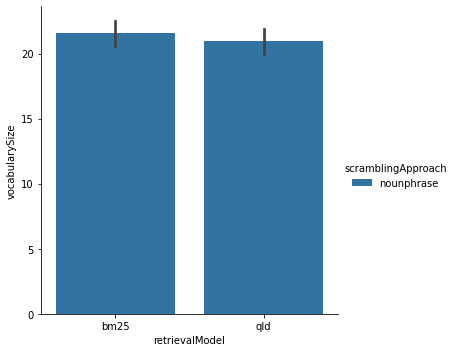

In [7]:
sns.catplot(data = df_query_stats, x='retrievalModel', y='vocabularySize', hue='scramblingApproach', kind='bar')

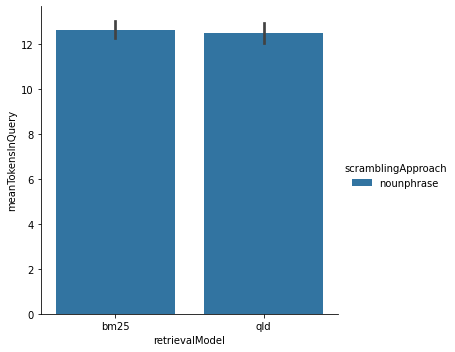

In [8]:
sns.catplot(data = df_query_stats, x='retrievalModel', y='meanTokensInQuery', hue='scramblingApproach', kind='bar')

In [5]:
def load_json(l):
    try:
        return json.loads(l)
    except:
        print(l)
        return None

def load_scrambled_queries(topic, approach, retrieval_model):
    #print('Process: ' + QUERY_DIR + approach + '-' + retrieval_model + '/' + str(topic) + '.jsonl')
    with open(QUERY_DIR + approach + '-' + retrieval_model + '/' + str(topic) + '.jsonl') as f:
        for l in tqdm(f):
            l = load_json(l)
            if not l:
                continue
            
            hits_at_10 = 0
            hits_at_100 = 0
            for _, pos in l['targetDocs'].items():
                if pos and pos <= 10:
                    hits_at_10 += 1
                if pos and pos <= 100:
                    hits_at_100 += 1
                    
            ret = {
                'topic': topic,
                'retrievalModel': retrieval_model,
                'approach': approach,
            }
            
            yield dict(ret, **{'value': hits_at_10/len(l['targetDocs']), 'measure': 'recall@10'})
            yield dict(ret, **{'value': hits_at_100/len(l['targetDocs']), 'measure': 'recall@100'})

In [ ]:
df = []

for approach in APPROACHES:
    for retrievalModel in RETRIEVAL_MODELS:
        for topic in TOPICS:
            df += [i for i in load_scrambled_queries(topic, approach, retrievalModel)]
df = pd.DataFrame(df)

1023it [00:00, 35346.13it/s]
1023it [00:00, 32667.71it/s]
1023it [00:00, 45057.42it/s]
1023it [00:00, 46245.75it/s]
1023it [00:00, 48511.81it/s]
1023it [00:00, 22012.88it/s]
1023it [00:00, 45344.55it/s]
1023it [00:00, 24879.09it/s]
1023it [00:00, 45951.07it/s]
1023it [00:00, 51474.04it/s]
1023it [00:00, 24958.98it/s]
1023it [00:00, 24106.28it/s]
1023it [00:00, 26207.68it/s]
1023it [00:00, 42653.09it/s]
1023it [00:00, 25635.53it/s]
1023it [00:00, 24346.05it/s]
1023it [00:00, 19672.25it/s]
1023it [00:00, 45432.89it/s]
1023it [00:00, 45251.77it/s]
1023it [00:00, 27738.96it/s]
1023it [00:00, 20228.24it/s]
1023it [00:00, 20567.80it/s]
1023it [00:00, 12352.56it/s]
1023it [00:00, 47093.39it/s]
1023it [00:00, 21864.70it/s]
1023it [00:00, 24996.20it/s]
1023it [00:00, 44888.67it/s]
1023it [00:00, 44057.63it/s]
1023it [00:00, 39588.62it/s]
1023it [00:00, 47014.44it/s]
1023it [00:00, 23778.58it/s]
1023it [00:00, 43778.48it/s]
1023it [00:00, 42134.97it/s]
1023it [00:00, 46142.31it/s]
1023it [00:00,

In [1]:
len(df)

NameError: name 'df' is not defined

In [35]:
df.to_json('/mnt/ceph/storage/data-in-progress/data-research/web-search/private-web-search-with-keyqueries/scrambling-on-anserini/scrambling-recall-evaluaation.jsonl', orient='records')

In [38]:
def build_print_df(df):
    ret = []
    for measure in df['measure'].unique():
        for model in df['retrievalModel'].unique():
            for approach in df['approach'].unique():
                df_measure_model_approach = df[(df['measure'] == measure) & (df['retrievalModel'] == model) & (df['approach'] == approach)]
                
                for topic in df_measure_model_approach['topic'].unique():
                    tmp_df =  df_measure_model_approach[(df_measure_model_approach['topic'] == topic)].sort_values('value', ascending=False).reset_index()
                    for topic, v in tqdm(tmp_df.iterrows()):
                        enter = topic < 100 or (topic < 1000 and (topic % 10) == 0) or (topic < 10000 and (topic % 100) == 0) or ((topic % 1000) == 0)
                        if enter:
                            ret += [{
                                'topic': topic,
                                'measure': measure,
                                'model': model,
                                'approach': approach,
                                'value': v['value']
                            }]
                        
    return pd.DataFrame(ret)

df_plot = build_print_df(df)

1023it [00:00, 7037.45it/s]
1023it [00:00, 7030.86it/s]
1023it [00:00, 7277.18it/s]
1023it [00:00, 7133.60it/s]
1023it [00:00, 6806.83it/s]
1023it [00:00, 5212.52it/s]
1023it [00:00, 7065.99it/s]
1023it [00:00, 6592.19it/s]
1023it [00:00, 5829.80it/s]
1023it [00:00, 6117.07it/s]
1023it [00:00, 6204.92it/s]
1023it [00:00, 6371.68it/s]
1023it [00:00, 5968.61it/s]
1023it [00:00, 6068.23it/s]
1023it [00:00, 6797.41it/s]
1023it [00:00, 6817.55it/s]
1023it [00:00, 6824.12it/s]
1023it [00:00, 7410.74it/s]
1023it [00:00, 7285.66it/s]
1023it [00:00, 7027.49it/s]
1023it [00:00, 4460.86it/s]
1023it [00:00, 6531.25it/s]
1023it [00:00, 6485.95it/s]
1023it [00:00, 7537.18it/s]
1023it [00:00, 7281.23it/s]
1023it [00:00, 7076.98it/s]
1023it [00:00, 7207.35it/s]
1023it [00:00, 7270.29it/s]
1023it [00:00, 7105.36it/s]
1023it [00:00, 7330.11it/s]
1023it [00:00, 6683.34it/s]
1023it [00:00, 7198.78it/s]
1023it [00:00, 6796.84it/s]
1023it [00:00, 7161.94it/s]
1023it [00:00, 6830.97it/s]
1023it [00:00, 6846.

In [40]:
df_plot.to_json('/mnt/ceph/storage/data-in-progress/data-research/web-search/private-web-search-with-keyqueries/scrambling-on-anserini/df-plot-for-scrambling-recall-evaluation.jsonl', orient='records')

In [141]:
df_plot[df_plot['topic'] <= 25]

,topic,measure,model,approach,value
0,0,recall@10,bm25,nounphrase,0.3
1,1,recall@10,bm25,nounphrase,0.3
2,2,recall@10,bm25,nounphrase,0.3
3,3,recall@10,bm25,nounphrase,0.3
4,4,recall@10,bm25,nounphrase,0.3
...,...,...,...,...,...
11161,940,recall@100,qld,tf-idf,0.0
11162,950,recall@100,qld,tf-idf,0.0
11163,960,recall@100,qld,tf-idf,0.0
11164,970,recall@100,qld,tf-idf,0.0


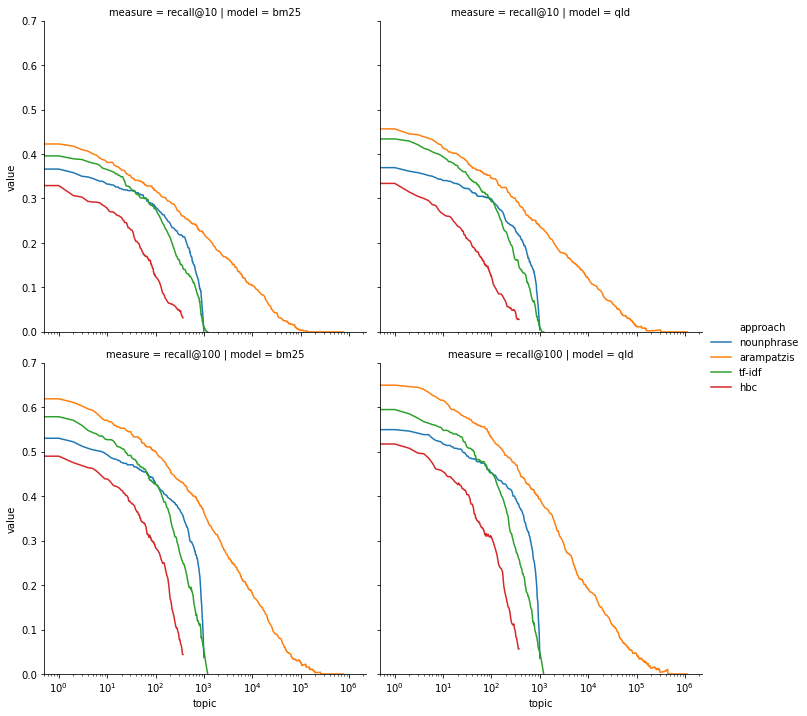

In [56]:
plot = sns.relplot(data=df_plot[((df_plot['approach'] == 'hbc') & (df_plot['topic'] < 380)) | (df_plot['approach'] != 'hbc')], x='topic', y='value', kind='line', hue='approach', row='measure', col='model', facet_kws={'ylim': (0,0.7)}, ci=None)
plot.set(xscale="log")
plot

plot.savefig('recall-of-scrabled-queries-per-topic.pdf')

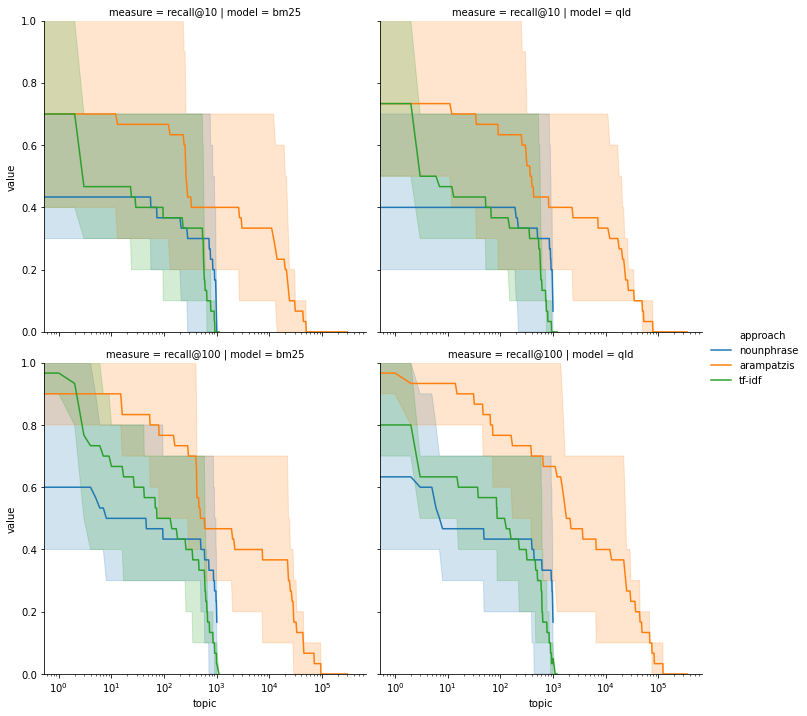

In [146]:
plot = sns.relplot(data=df_plot, x='topic', y='value', kind='line', hue='approach', row='measure', col='model', facet_kws={'ylim': (0,1)}, ci=None)
plot.set(xscale="log")
plot


In [108]:
plot.savefig('recall-of-scrabled-queries-per-topic.pdf')

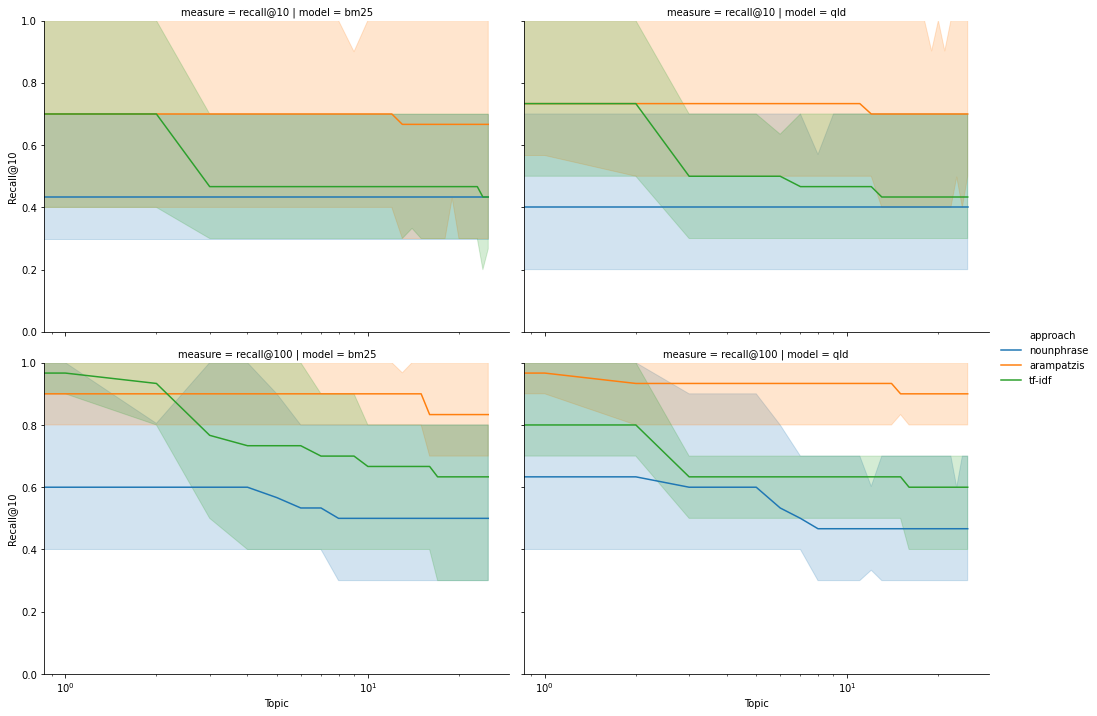

In [142]:
plot = sns.relplot(data=df_plot[df_plot['topic'] <= 25],  x='topic', y='value', kind='line', hue='approach', row='measure', col='model', aspect=1.4, facet_kws={'ylim': (0,1)})
plot.set(xscale="log")
plot.set_axis_labels('Topic','Recall@10')
plot

In [133]:
plot.savefig('recall-of-scrabled-queries-per-topic.pdf')

In [ ]:
plot = sns.relplot(data=df_plot, x='topic', y='value', kind='line', hue='approach', row='measure', col='model', ci='')
plot.set(xscale="log")
plot


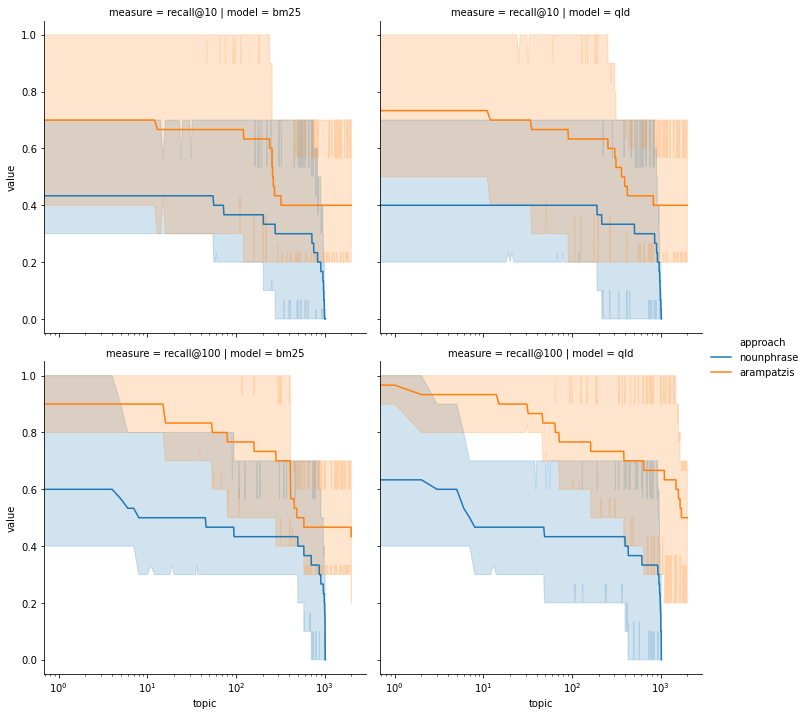

In [104]:
plot = sns.relplot(data=df_plot, x='topic', y='value', kind='line', hue='approach', row='measure', col='model')
plot.set(xscale="log")
plot


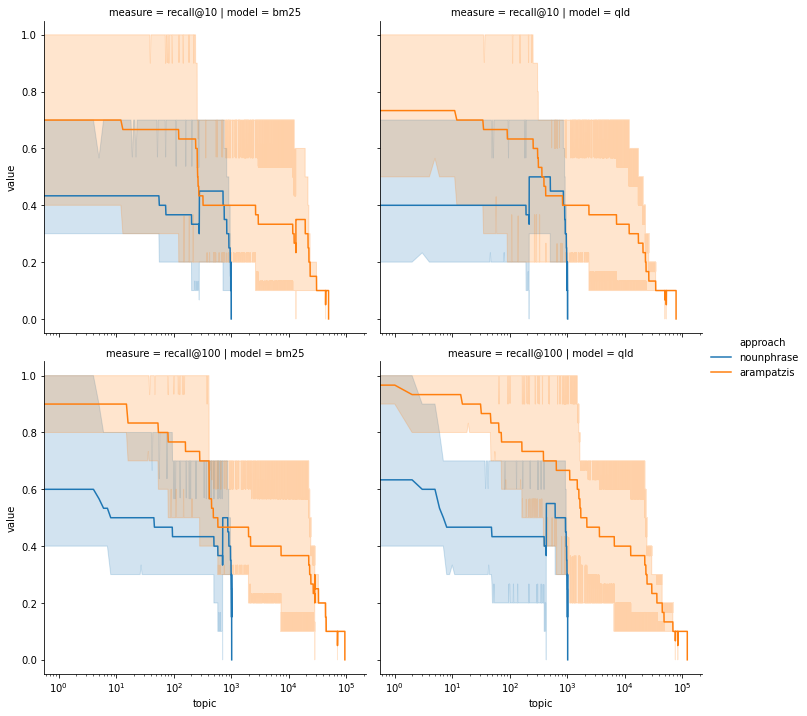

In [101]:
plot = sns.relplot(data=df_plot, x='topic', y='value', kind='line', hue='approach', row='measure', col='model')
plot.set(xscale="log")
plot


In [ ]:
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


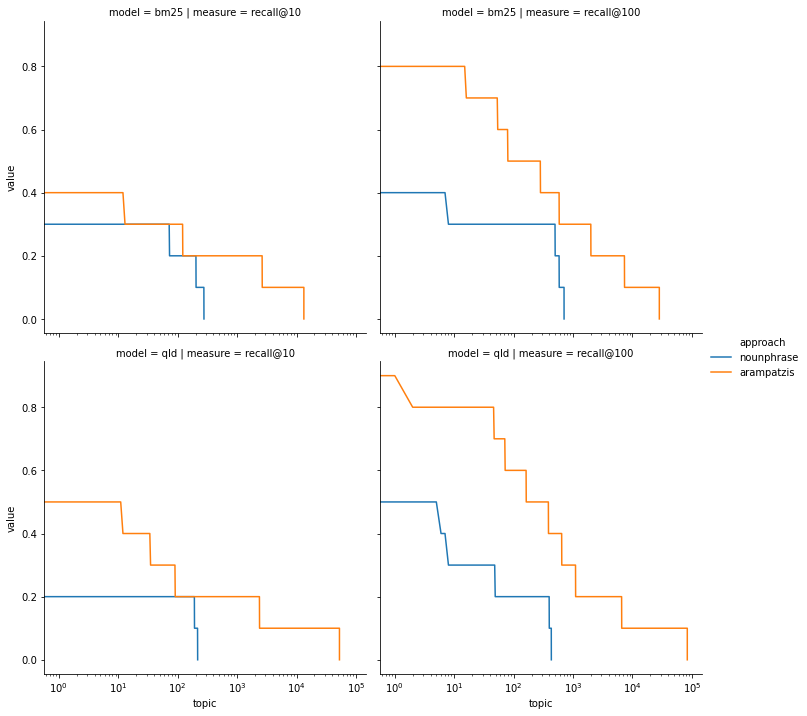

In [93]:
plot = sns.relplot(data=df_plot, x='topic', y='value', kind='line', hue='approach', col='measure', row='model')
plot.set(xscale="log")
plot